<a href="https://colab.research.google.com/github/zeroaioficial/data_marketing/blob/main/Analisando_os_Dados_do_Airbnb_%5BNY_e_RJ%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://zeroai.com.br/wp-content/uploads/2021/09/cropped-cropped-logo_zero_preto.png">

#### **Discover | Projetos**
*by [Hyan Dias](https://www.linkedin.com/in/hyan-dias/)*

---
---
# **Análise dos Dados do Airbnb**
### Comparando *New York (United States)* e *Rio de Janeiro (Brasil)*

Quando você pensa em viajar e conhecer novos lugares, qual é a primeira plataforma que vem a sua mente para alugar um alojamento? Se pensou no [Airbnb](https://www.airbnb.com.br/), saiba que você é um dos 150 milhões de pessoas que tambem escolheria ele.

O Airbnb já é considerado como sendo a **maior empresa hoteleira da atualidade**. E um detalhe importante, eles **não possui nenhum hotel**!

Ela conecta pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática. O Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

A startup fundada em 2008, na California (EUA), ganhou o mundo. E mesmo em um momento pandemico, sua **receita no primeiro trimestre de 2021** foi de **US $ 887 milhões**, um valor 5% maior que o primeiro trimestre de 2020.

Uma das iniciativas do Airbnb é disponibilizar dados do site de algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="15%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

Neste *notebook*, iremos analisar os dados referentes às cidades de New York (United States) e comparar com o Rio de Janeiro (Brasil), e ver quais insights podem ser extraídos a partir de dados brutos.

## Obtenção dos Dados


Os dados utilizados nessa análise foram extraidos do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Nele você irá escolher quais cidades irá explorar, e minha sugestão é baixar os arquivos `listings.csv`, pois contém informações mais resumidas e focadas para nossas necessidades.

**Importante**: O portal está em constante evolução, e em determinado momento, pode ser que o conjunto de dados exato utilizado nessa analise não esteja mais disponível, o que poderá trazer um erro no código.

E para resolver isso, disponibilizei o arquivo diretamente do meu Dropbox [New York](https://www.dropbox.com/s/n549aj0j5suchjw/listingsNY.csv?dl=1) e [Rio de Janeiro](https://www.dropbox.com/s/waol6v6p97mhj55/listingsRJ.csv?dl=1), para que sempre consiga utilizar nessa análise.

In [1]:
# importar os pacotes necessarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from matplotlib import pyplot

%matplotlib inline

Uma dica para quem usar o Dropbox, quando você gera um link para compartilhar o seu Dataset (csv), note que no final do link vai haver o código `dl=0`, altere ele para `dl=1`, assim você irá informar ao Dropbox que queremos o arquivo Excel e não o HTML.

In [2]:
# importar o arquivo listings.csv para um DataFrame
dfRJ = pd.read_csv("https://www.dropbox.com/s/n549aj0j5suchjw/listingsNY.csv?dl=1")
dfNY = pd.read_csv("https://www.dropbox.com/s/waol6v6p97mhj55/listingsRJ.csv?dl=1")

## Análise dos Dados



O primeiro passo é explorar os dados, entender quais informações está contida  dentro do Dataset, como está estruturado, o que é cada variável e assim por diante.



**Dicionário das variáveis**

* `id` O número de identificação do imóvel
* `name` Nome da propriedade anunciada
* `hot_id` O número de identificação do proprietario (anfitrião) do imóvel
* `neighbourhood_group` É uma identificação para um grupo de bairros (Ex: *Zona Sul* do RJ | Botafogo, Catete, Copacabana e outros..)
* `latitude` Coordenada de Latitude do imóvel
* `longitude` Coordenada de Longitude do imóvel
* `room_type` O tipo de quarto ofertado
* `price` Preço por per noite do imóvel à ser alugado em Dolar (USD)
* `minimum_nights` Noites mínimas para locação
* `number_of_reviews` Quantidade de avaliações que o imóvel recebeu
* `last_review` Data da ultima avaliação
* `reviews_per_month` Quantidade de avaliações por mês
* `calculated_host_listings_count` Quantidade de imóveis do mesmo anfitrião
* `availability_365` Número total de dias em que o anúncio está disponível durante o ano
* `number_of_reviews_ltm` Quantidade de avaliação dos ultimos 12 meses
* `license` Esta coluna não contém nenhum valor válido

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
print(f'Tabela de dados de \033[1;33mNew York\033[0m')
display(dfNY.head(5))
print(f'\n\nTabela de dados de \033[1;34mRio de Janeiro\033[0m')
display(dfRJ.head(5))


Tabela de dados de New York


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.33,3,340,0,NaN
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,76,1,408,2021-06-29,5.03,1,208,58,NaN
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2016-06-05,0.54,1,365,0,NaN
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,5,2,2021-08-08,0.02,1,204,1,NaN
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,490,2021-08-14,3.64,1,243,17,NaN




Tabela de dados de Rio de Janeiro


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,350,4,265,2021-05-21,2.07,1,314,12,NaN
1,24480,"Nice and cozy near Ipanema Beach, w/ home office",99249,Goya,NaN,Ipanema,-22.98405,-43.20189,Entire home/apt,297,3,85,2017-04-22,0.86,1,30,0,NaN
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97735,-43.19105,Entire home/apt,160,7,238,2019-04-27,1.86,2,266,0,NaN
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98839,-43.19232,Entire home/apt,271,2,181,2019-12-06,1.92,1,151,0,NaN
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98107,-43.19136,Entire home/apt,121,3,371,2019-06-15,3.05,1,30,35,NaN


### **Atributos e entradas**

Precisamos entender qual o volume de dados que possuímos para ambos os Datasets. Lembrando que estamos usando uma versão com dados resumidos, se quiser analisar mais profundamente, sugiro baixar o arquivo `listings.csv.gz`.

Outro ponto a se observar são os atributos de cada variável, ou seja, saber se é uma string (*object*), número inteiro (*int64*), número real (*float64*) e assim por diante.

In [4]:
# identificar o volume de dados do DataFrame
print(f'\033[1mNew York\033[0m\nEntradas: {dfNY.shape[0]}\nVariáveis: {dfNY.shape[1]}\n')
print(f'\033[1mRio de Janeiro\033[0m\nEntradas: {dfRJ.shape[0]}\nVariáveis: {dfRJ.shape[1]}\n')
print(f'\033[1mTipo dos dados por variáveis\033[0m')
display(dfNY.dtypes)

# verificar as 5 primeiras entradas do dataset


New York
Entradas: 36923
Variáveis: 18

Rio de Janeiro
Entradas: 23414
Variáveis: 18

Tipo dos dados por variáveis


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

Note que a variável `last_review` é uma data, mas nosso DataFrame entende que ele é uma string. Para isso precisamos mudar ele para o atributo *datatime64*

In [5]:
#converter a data (object) para um datatime
dfNY.last_review = pd.to_datetime(dfNY.last_review, format="%Y-%m-%d")
dfRJ.last_review = pd.to_datetime(dfRJ.last_review, format="%Y-%m-%d")

### **Valores ausentes no *dataset***

Tratar os valores ausentes corretamente é umas das partes importante da análise de dados. Os valores ausentes podem ser representados de muitas maneiras, entre elas como nulos, células vazias, com o valor NAN ou um valor artificial como 9999.
* As variáveis `name` e `host_name` tem aproximadamente menos que 0,3% da valores ausentes
* O `neighbourhood_group` do dataset do Rio de Janeiro está com 100% dos seus valores faltantes.
* O `license` de ambos os dataset também está com 100% dos seus valores faltantes.
* O `last_review`	e `reviews_per_month` estão com 25,17% dos valores ausentes no dataset do New York e 35,62% no dataset do Rio de janeiro

In [6]:
variaveis = ['id',
      'name',
      'host_id',
      'host_name',
      'neighbourhood_group',
      'neighbourhood',
      'latitude',
      'longitude',
      'room_type',
      'price',
      'minimum_nights',
      'number_of_reviews',
      'last_review',
      'reviews_per_month',
      'calculated_host_listings_count',
      'availability_365',
      'number_of_reviews_ltm',
      'license']

vz = []
dado = []
for i in variaveis:
  dado.append(dfNY[i].isnull().sum() / dfNY[i].shape[0])
  dado.append(dfRJ[i].isnull().sum() / dfRJ[i].shape[0])
  vz.append(dado[:])
  dado.clear()
vz  

pd.DataFrame(vz, columns=['New York', 'Rio de Janeiro'], index=variaveis)

,New York,Rio de Janeiro
id,0.000000,0.000000
name,0.000352,0.000897
host_id,0.000000,0.000000
host_name,0.003006,0.000769
neighbourhood_group,0.000000,1.000000
neighbourhood,0.000000,0.000000
latitude,0.000000,0.000000
longitude,0.000000,0.000000
room_type,0.000000,0.000000
price,0.000000,0.000000


Como as variveis `name`e `host_name`, possuem um percentual baixo de valores ausentes, nós iremos eliminar essas linhas, já que não irá interferir na análise.

In [7]:
#vamos limpar os dados das colunas 
dfNY_clean = dfNY.dropna(subset=['name', 'host_name'], axis=0)
dfRJ_clean = dfRJ.dropna(subset=['name', 'host_name'], axis=0)

Já para o `reviews_per_month` e `last_reviwe`, o percentual é alto e com certeza eliminar ele impactaria nos resultados. Por esse fator iremos substituir os valores ausentes pela mediana de cada variável.

In [8]:
#preencher os valores ausentes com a mediana
#reviews per month ny
rpm_ny_median = dfNY_clean.reviews_per_month.median()
dfNY_clean = dfNY_clean.fillna({"reviews_per_month": rpm_ny_median})
#last_reviwe ny
lr_ny_median = dfNY_clean['last_review'].astype('datetime64[ns]').quantile(0.5, interpolation="midpoint")
dfNY_clean = dfNY_clean.fillna({"last_review": lr_ny_median})

#reviwes per mouth rj
rpm_rj_median = dfRJ_clean.reviews_per_month.median()
dfRJ_clean = dfRJ_clean.fillna({"reviews_per_month": rpm_rj_median})
#last_reviwe rj
lr_rj_median = dfRJ_clean['last_review'].astype('datetime64[ns]').quantile(0.5, interpolation="midpoint")
dfRJ_clean = dfRJ_clean.fillna({"last_review": lr_ny_median})

### **Distribuição das variáveis** 

Identificar qual a distribuição dos valores, irá nos ajudar a entender se existe valores discrepante (outliers), que de alguma forma irá influenciar nossa análise. Por esse fator faremos um boxplot com ambos os conjuntos de dataset.

Iremos analisar o `price` e o `minimum_nights`, já que essas duas variáveis são as mais importantes a serem observadas.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


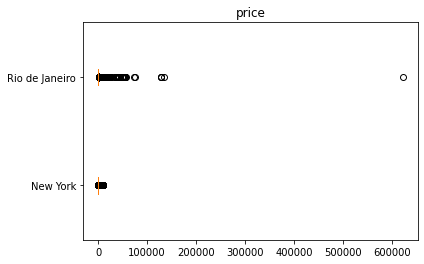

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


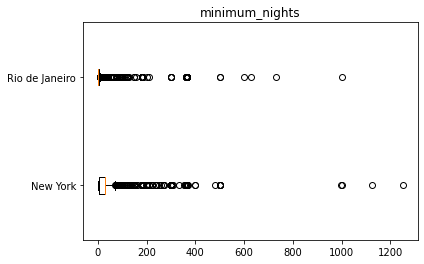

In [9]:
dx0 = ['price', 'minimum_nights']

for n in dx0:
    data_a = dfNY_clean[n]
    data_b = dfRJ_clean[n]
    data_2d=[data_a,data_b]
    plt.boxplot(data_2d, vert=False, labels=["New York", "Rio de Janeiro"])
    plt.title(n)
    plt.show()

O aviso que aparece sobre o boxplot é originado pelo fato do dataset do New York ser maior (quantidade de entradas) que o do Rio de Janeiro, criando uma sinalização de alerta, mas não quer dizer que há um erro, já que a função `plt.boxplot` da ênfase em usar sempre a mesma quantidade de dados para comparar dois datasets.

Note que para ambas as variáveis e datasets existem valores discrepantes, é um pouco óbvio notar que não existe realmente um imóvel que possua um `price` de US$ 600.000 por noite no Rio de Janeiro, provavelmente é um erro de cadastro ou do sistema.

Isso ocorre também com o `minimum_nights`, pois é quase improvável existir ofertas de imóveis onde o usuário teria que ficar no mínimo 3 anos hospedado.

Esses valores (outliers) interferem na média e desvio padrão da amostra, deixando mais complicado identificar um padrão ou tirar uma informação relevante.

### **Retirando os Outliers**

Existe alguns métodos para remover os outliers, mas iremos fazer algo mais genérico com base na observação. Para isso vamos analisar os dados estatísticos com o comando `describe()`.

In [10]:
# Ver resumo estatistico 
print("\033[1;33mNew York\033[0m")
dfNY_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

New York


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,36799.000000,36799.000000,36799.000000,36799.000000,36799.000000,36799.000000
mean,169.356803,22.130112,23.047827,1.199789,13.442920,123.594255
std,299.583957,27.943759,49.455410,3.534317,45.067787,138.273265
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,70.000000,3.000000,1.000000,0.180000,1.000000,0.000000
50%,110.000000,30.000000,4.000000,0.440000,1.000000,61.000000
75%,185.000000,30.000000,20.000000,1.000000,3.000000,264.000000
max,10000.000000,1250.000000,1006.000000,163.190000,307.000000,365.000000


In [11]:
print('\033[1;34mRio de Janeiro\033[0m')
dfRJ_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

Rio de Janeiro


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,23375.000000,23375.000000,23375.000000,23375.000000,23375.000000,23375.000000
mean,711.739594,5.283209,14.095786,0.515049,7.236791,229.120171
std,4939.632466,20.863285,33.284845,0.751142,21.707342,130.198335
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,150.000000,1.000000,0.000000,0.160000,1.000000,90.000000
50%,270.000000,2.000000,2.000000,0.270000,1.000000,264.000000
75%,548.000000,4.000000,11.000000,0.480000,3.000000,362.000000
max,621850.000000,1000.000000,486.000000,25.520000,187.000000,365.000000


Observando os dados podemos confirmar algumas hipóteses:
* A variável `price` do Rio de Janeiro possui 75% dos valores abaixo de USD 548,00 porém seu valor máximo é USD 621.850,00
* A variável `price` do New York possui 75% dos valores abaixo de USD 185,00 porém seu valor máximo é USD 10.000,00
* E o 3° quartil (75% dos valores) da `minimum_nights` no Rio de janeiro e New York está abaixo de 4 e 30 dias, respectivamente.


In [12]:
# remover os *outliers* do New York
dfNY_out = dfNY_clean.copy()
dfNY_out.drop(dfNY_out[dfNY_out.price > 270].index, axis=0, inplace=True)
dfNY_out.drop(dfNY_out[dfNY_out.minimum_nights > 65].index, axis=0, inplace=True)

# remover os *outliers* do Rio de Janeiro
dfRJ_out = dfRJ_clean.copy()
dfRJ_out.drop(dfRJ_out[dfRJ_out.price > 600].index, axis=0, inplace=True)
dfRJ_out.drop(dfRJ_out[dfRJ_out.minimum_nights > 6].index, axis=0, inplace=True)

Colocamos um pouco acima do 3° quartil como restrição dos valores, para podermos gerar um novo dataframe, sem os outliers.

Basta agora reproduzir o boxplot como o anterior. E vamos ver claramente que não haverá pontos discrepantes.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


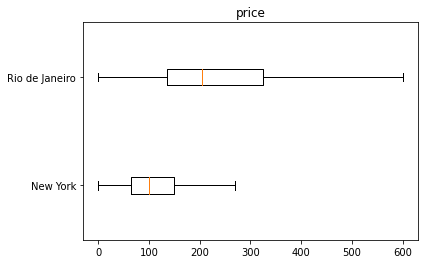

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


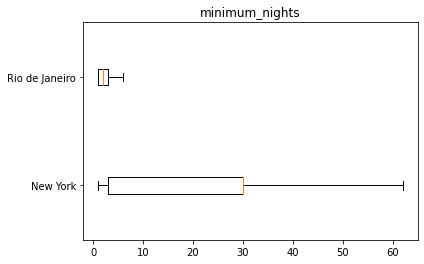

In [13]:
for n in dx0:
    data_a = dfNY_out[n]
    data_b = dfRJ_out[n]
    data_2d=[data_a,data_b]
    plt.boxplot(data_2d, vert=False, labels=["New York", "Rio de Janeiro"])
    plt.title(n)
    plt.show()

Vamos também analisar a distribuição atráves de um histograma e assim ter um comparativo melhor.

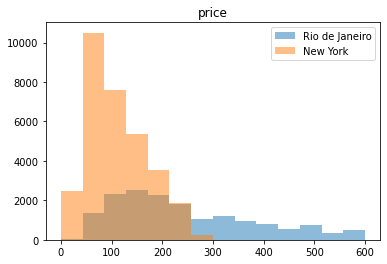

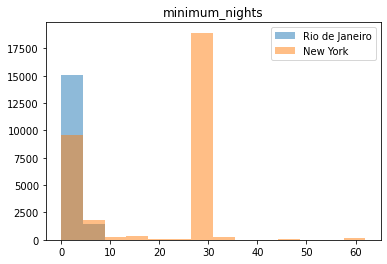

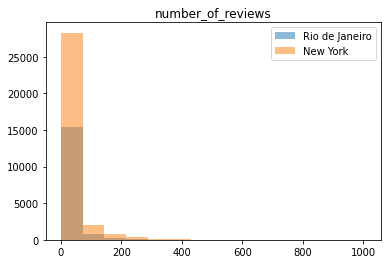

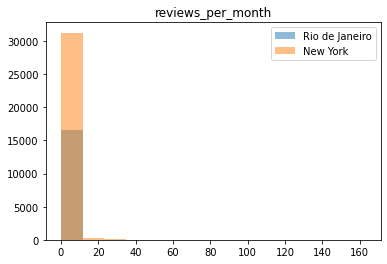

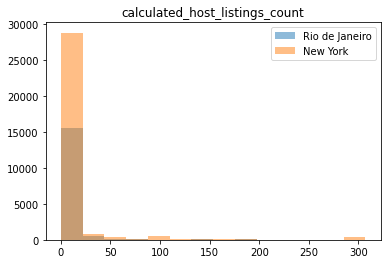

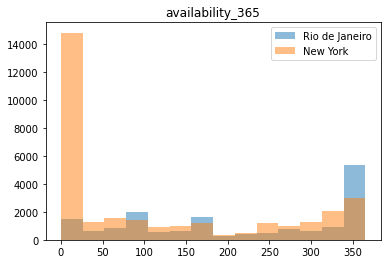

In [14]:
dx = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']

for n in dx:
  if dfNY_out[n].max() >= dfRJ_out[n].max():
    maior = int(dfNY_out[n].max())
  else:
    maior = int(dfRJ_out[n].max())
  bins = np.linspace(0, maior, 15)
  pyplot.hist(dfRJ_out[n], bins, alpha=0.5, label='Rio de Janeiro')
  pyplot.hist(dfNY_out[n], bins, alpha=0.5, label='New York')
  pyplot.legend(loc='upper right')
  pyplot.title(n)
  pyplot.show()

Com tudo, identificamos algumas informações:
* A distribuição (desvio padrão) e média do `price` em New York é menor que no Rio de Janeiro.
* No Rio de Janeiro o `minimum_nights` está em um intervalo de 1 a 5 dias, enquanto em New York varia entre 25 e 30 dias, além de também haver demandas para 1 a 5 dias.
* O `availability_365` ou o tempo de anúncio do imóvel no Rio de janeiro fica quase 365 dias disponíveis, enqauanto que em New York os anúncios em geral ficam apenas por 30 dias.

### **Correlação existente entre as variáveis**

A correlação mede a direção e o grau de associação linear entre as variáveis, ou seja, o quando uma variável pode influenciar outra. 
* A intensidade da relação é um valor entre 0 e 1, sendo que cada vez mais próximo de 1 maior é a sua correlação
* Se for um valor positivo, ela uma correlação proporcional, ou seja, se uma variável aumentar a outra aumenta também.
* Se for um valor negativo, ela será uma correlação inversamente proporcional, ou seja, se uma variável aumentar a outra diminui.

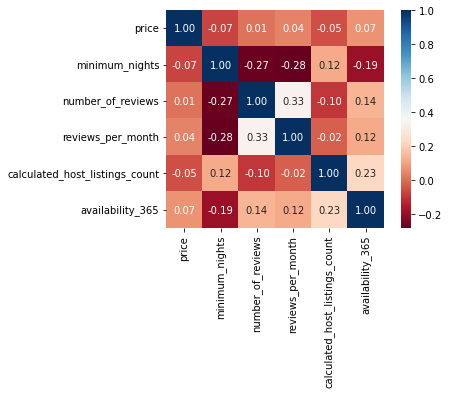

In [15]:
# criar uma matriz de correlação NEW YORK
corr = dfNY_out[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);




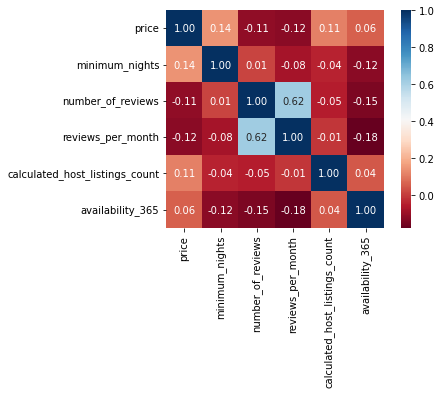

In [16]:
# criar uma matriz de correlação RIO DE JANEIRO
corr = dfRJ_out[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

E quando observamos a correlação tiramos algumas informações:
* Em New York o `minimum_nights` e `number_of_reviews`tem uma pequena correlação inversamente proporcional.
* Em New York o `calculated_host_listings_count` e o `availability_365` também tem uma pequena correlação proporcional.
* Tanto para o Rio de Janeiro quanto para New York, existe uma correlação entre `number_of_reviews`e `reviews_per_month`, sendo que no Rio de Janeiro essa correlação é muito mais intensa. 

### **Analisando os imóvel mais alugados**

Vamos analisar aqui os tipo de imoveis que as pessoas escolhem, usaremos os dados da variável `room_type`. Mas primeiramente é importante saber os tipos de imovel ofertados:
* **Entire home/apt**: Casa ou apartamento inteiro (todos os cômodos)
* **Private room**: Quarto privado
* **Shared room**: Quarto compartilhado com outras pessoas
* **Hotel room**: Quarto de hotel

In [17]:
# mostrar a quantidade de cada tipo de imóvel disponível

var = ['Entire home/apt',
       'Private room',
       'Shared room',
       'Hotel room']

vz_var = []
dado_var = []
for i in var:
  dado_var.append(dfNY_out.loc[dfNY_out.room_type == i].shape[0])
  dado_var.append(dfNY_out.loc[dfNY_out.room_type == i].shape[0] / dfNY_out.room_type.shape[0])
  dado_var.append(dfRJ_out.loc[dfRJ_out.room_type == i].shape[0])
  dado_var.append(dfRJ_out.loc[dfRJ_out.room_type == i].shape[0] / dfRJ_out.room_type.shape[0])
  vz_var.append(dado_var[:])
  dado_var.clear()
vz_var  


pd.DataFrame(vz_var, columns=['New York', '%','Rio de Janeiro','%'], index=var)

,New York,%,Rio de Janeiro,%
Entire home/apt,15672,0.496106,11171,0.675924
Private room,15223,0.481893,4822,0.291765
Shared room,544,0.017221,467,0.028257
Hotel room,151,0.004780,67,0.004054


Para fazer um comparativo melhor com as duas cidades, correlacionaremos o percentual que ambas tem em relação aos tipo de imóveis para alugar.

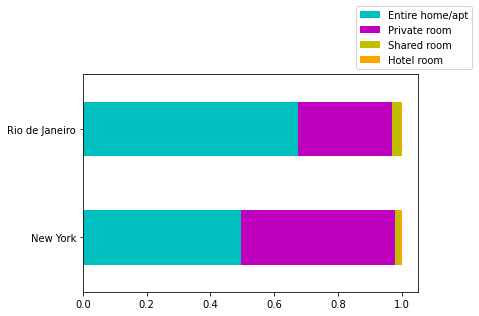

In [18]:
dado_var = {}
for i in var:
  dado_var[i] = [dfNY_out.loc[dfNY_out.room_type == i].shape[0] / dfNY_out.room_type.shape[0] , dfRJ_out.loc[dfRJ_out.room_type == i].shape[0] / dfRJ_out.room_type.shape[0]]

dado_var
ima = pd.DataFrame(dado_var, index=['New York', 'Rio de Janeiro'])
ima.plot(kind="barh",stacked=True,figsize=(6,4), color=['c', 'm', 'y', 'orange'])
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()

New York tem uma disponibilidade de imóveis bem distribuidas entre `Entire home/apt`e `private room`, quase 50% cada.

Já o Rio de Janeiro, nota-se que a disponibilidade é maior para `Entire home/apt`.

### **Localidades mais caras**



Essa deve ser uma das etapas mais interessante na hora de analisar, principalmente quando o assunto é pesquisar um imóvel para escolher.

Queremos entender quais os bairros mais caros em New York.

In [19]:
print("\033[1;33mNew York\033[0m")
dfNY_out.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

New York


neighbourhood
Belle Harbor       210.600000
Gerritsen Beach    200.000000
Neponsit           200.000000
Navy Yard          197.000000
Westerleigh        168.000000
Breezy Point       166.333333
West Village       165.560914
NoHo               165.068966
Oakwood            163.714286
New Springville    160.500000
Name: price, dtype: float64

Começando com New York, observe que a diferença não é tão grande entre Belle Harbor, Gerritsen Beach e Neposit que são os bairros mais caros.

Tirando o fato que os três estão bem próximos um do outro e localizado perto Marine Parkway Bridge. Todas elas possuem poucos imóveis para serem locados, assim gerando um preço mais elevado, relação demanda e oferta.

Olhando o mapa, parece haver uma alta oferta em Manhattan, sendo seu preço um pouco mais altos quando comparado a grandes bairros.

New York


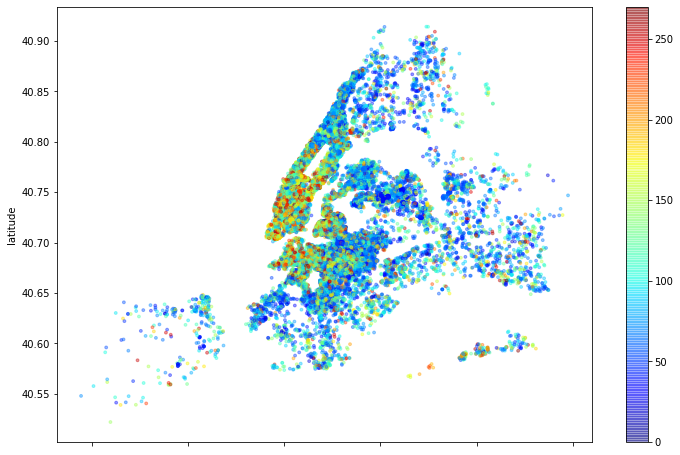

In [24]:
print("\033[1;33mNew York\033[0m")
dfNY_out.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=dfNY_out['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));      

Já o Rio de Janeiro é uma cidade turística, e quando avaliamos quais os bairros mais caros, percebemos que não aparece nenhum dos mais famosos, como Copacabana, Ipanema e Leme.

Podemos atribuir ao mesmo fator que analisamos em New York, no caso, os bairros mais caros possuem entre 1 a 2 ofertas de imóveis para serem alugados, ou seja, a média dos preço do bairro está ligado diretamente a essas poucas ofertas. 

In [21]:
print('\033[1;34mRio de Janeiro\033[0m')
dfRJ_out.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Ribeira          500.000000
Barros Filho     500.000000
Cascadura        452.500000
Pavuna           383.500000
Cavalcanti       350.000000
Gardênia Azul    349.230769
Paciência        346.000000
Leblon           343.046338
Moneró           309.000000
Higienópolis     308.750000
Name: price, dtype: float64

Olhando o mapa do Rio de Janeiro, os imóveis mais próximos do mar são os que aparentam ter um maior preço médio, principalmente comparado a zona norte.

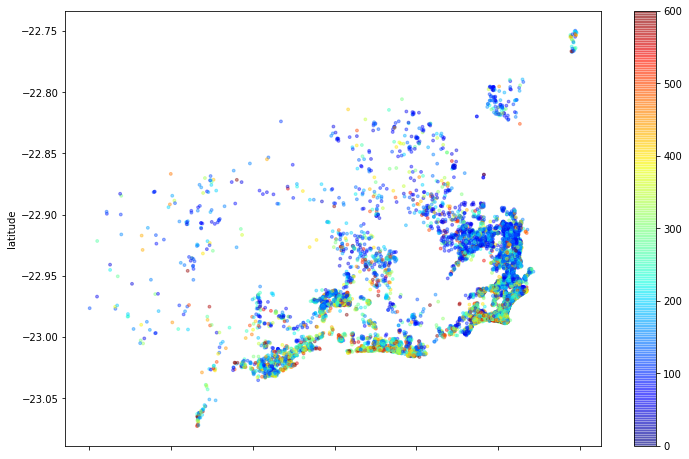

In [22]:
print('\033[1;34mRio de Janeiro\033[0m')
dfRJ_out.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=dfRJ_out['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));      

## Conclusões


Para todo o processo de análise de dados é fundamenta entender e explorar os dados do dataset, identificar os valores nulos e os outliers.
Em uma análise superficial, conseguimos comparar New York com o Rio de Janeiro e notar mudanças importante como:

* O ticket médio (Preço médio) dos imóveis em New York é menor que no Rio de Janeiro (Respectivamente US$ 114,00 e 244,00) .
* A média do mínimo de noites ofertados na locação no Rio de Janeiro é 6x menor que em New York.
* O tempo de exposição que o anúncio está disponível durante o ano em New York é quase a metade do tempo de exposição do anúncio no Rio de Janeiro.

Para nos que trabalhamos com marketing, essas informações são valiosas, podendo assim gerar soluções relevantes como: 

- As pessoas que ofertam seus imóveis (anfitriões) no Rio de Janeiro, podem receber uma solução (desenvolvimento de campanhas de marketing) que ajude a ter uma frequência maior de locação durante o ano para seus imóveis.
- Já para os anfitriões de New York que procuram por clientes que querem ficar um mês hospedado (a trabalho, estudo ou passeio), podemos ofertar uma solução que ajude a precificar melhor seus imóveis em relação a época do ano e sua localização.